# Homework 1

# A fashionable use case : clothing classification with `fashion-mnist`

- Load data with `fashion_mnist.load_data()` 
- There is no validation set, only a train and test set. 
- The labels correspond to the following things

| Label number | Label name  |
|--------------|-------------|
| 0	           | T-shirt/top |
| 1	           | Trouser     |
| 2	           | Pullover    |
| 3	           | Dress       |
| 4	           | Coat        |
| 5	           | Sandal      |
| 6	           | Shirt       |
| 7	           | Sneaker     |
| 8	           | Bag         |
| 9	           | Ankle boot  |

## Your job

- Try to understand the data, visualize it, like we did before with MNIST and noMNIST
- Create a neural network, using the ideas from before, that classify accurately the clothes on the test set
- You will need to build a validation set from the train set in order to tune hyperparameters

## We want to see the following things

- Some learning curves (training) and the accuracy obtained on the test set for the architecture you considered
- A discussion about the impact of the hyperparameters on the accuracy (size of the kernels, number of kernels, number of layers, etc.) 
- A clear comparison between your solutions (a table, or plots comparing the results obtained with different hyper-parameters and different architectures)
- An explanation of what kind of clothes are hard to distinguish and why (some visual explanation)
- You'll get a good grade if you reach a good accuracy **and** if your notebook is clean, with clear graphs and explanations of what you did **and** if you did serious comparisons between different architectures
- You can do everything on your laptop, but it might be a good idea to use google `colab` (https://colab.research.google.com/) to get free access to a GPU
- You will send your notebook **containing** the results (**WE WON'T RUN YOUR NOTEBOOK**), namely with the graphs and results that you want to show, as a **unique** jupyter notebook file (`.ipynb` extension). We won't open any other supplementary file.

## Send your work using the following google form :

- https://forms.gle/G3Rwfcuj3MZfgXhr8

(you will need to create a google account if you don't have one).

## Example of architecture

As a start, you can use the following architecture (but you can and will change it) :

- Convolutional layer with 64 filters and 5 * 5 kernel sizes and 'relu' activation
- Max pooling with pool size 2 * 2
- Dropout with probability 0.25

- Convolutional layer with 128 filters and 5 * 5 kernel sizes and 'relu' activation
- Max pooling with pool size 2 * 2
- Dropout with probability 0.25

- Convolutional layer with 256 filters and 3 * 3 kernel sizes and 'relu' activation
- Max pooling with pool size 2 * 2
- Dropout with probability 0.25

- Dense layer with 256 units
- Dropout with probability 0.5
- Dense output layer with softmax activation

# Préparation

In [17]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [18]:
%matplotlib inline

## Visualisation des données

In [19]:
# Code pour afficher les images pris du notebook 11.

def plot_images(images, labels, n_rows = 4, n_cols = 8):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(n_cols, n_rows))
    for i in range(n_rows * n_cols):
        ax = plt.subplot(n_rows, n_cols, i+1)
        ax.imshow(images[i].reshape(28, 28),
                   interpolation="none", cmap="gray_r")
        ax.set_title(labels[i], fontsize=14)
        ax.axis("off")
    plt.tight_layout()

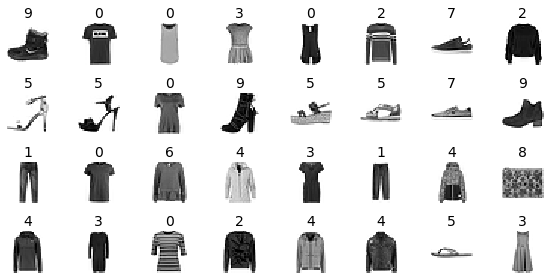

In [20]:
plot_images(train_images, train_labels)

## Pré-traitement des données

In [21]:
print("Taille du dataset de train :", train_images.shape, train_labels.shape)
print("Taille du dataset de test :", test_images.shape, test_labels.shape)
print("Type de donnée des images :", test_images.dtype)

Taille du dataset de train : (60000, 28, 28) (60000,)
Taille du dataset de test : (10000, 28, 28) (10000,)
Type de donnée des images : uint8


In [22]:
train_images[0].max()

255

On normalise les images et ont les transforme en float32 :

In [23]:
train_images = (train_images / train_images.max()).astype('float32')
test_images = (test_images / test_images.max()).astype('float32')

On rajoute une dimension pour pouvoir utiliser les couches Conv2D :

In [24]:
tf.keras.backend.image_data_format()

'channels_last'

In [25]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

----

In [26]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Les labels sont sous forme d'entiers, on va donc les transformer en catégories :

In [27]:
n_classes = 10
train_labels = tf.keras.utils.to_categorical(train_labels, n_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, n_classes)

In [28]:
train_labels[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

## Création du set de validation

In [29]:
from sklearn.model_selection import train_test_split
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=1/6)

print("Taille du dataset de train :", train_images.shape, train_labels.shape)
print("Taille du dataset de validation :", valid_images.shape, valid_labels.shape)
print("Taille du dataset de test :", test_images.shape, test_labels.shape)

Taille du dataset de train : (50000, 28, 28, 1) (50000, 10)
Taille du dataset de validation : (10000, 28, 28, 1) (10000, 10)
Taille du dataset de test : (10000, 28, 28, 1) (10000, 10)


Regardons la distribution des labels dans ces trois jeux de données :

<AxesSubplot:>

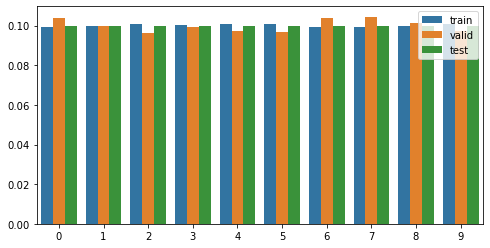

In [30]:

# Code adapté du notebook 11
def count(labels):
    return labels.sum(axis=0) / labels.sum()

group_names = (['train'] * n_classes + ['valid'] * n_classes + ['test'] * n_classes)
class_names = (np.arange(3*n_classes) % 10)
label_counts = np.hstack([count(train_labels), 
                         count(valid_labels),
                         count(test_labels)])

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=class_names, y=label_counts, hue=group_names, ax=ax)

Les données sont très bien équilibrées, leur distribution ne devrait poser aucun problème.

# Première architecture
On va dans un premier temps créer l'architecture donnée en exemple dans le sujet.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

input_shape = train_images.shape[1:]

## Création du modèle

In [32]:
base_model = Sequential()

base_model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', name='convolution_1', input_shape=input_shape))
base_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_1'))
base_model.add(Dropout(0.25, name='dropout_1'))

base_model.add(Conv2D(128, kernel_size=(5, 5), activation='relu', name='convolution_2'))
base_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_2'))
base_model.add(Dropout(0.25, name='dropout_2'))

base_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='convolution_3'))
base_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_3'))
base_model.add(Dropout(0.25, name='dropout_3'))


base_model.add(Flatten(name='flatten'))

base_model.add(Dense(256, activation='relu', name='dense'))
base_model.add(Dropout(0.5, name='dropout_dense'))

base_model.add(Dense(n_classes, activation='softmax', name='output'))

base_model.compile(loss=tf.keras.losses.categorical_crossentropy, 
                   optimizer=tf.keras.optimizers.Adam(), 
                   metrics=['accuracy'])
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution_1 (Conv2D)       (None, 24, 24, 64)        1664      
_________________________________________________________________
pooling_1 (MaxPooling2D)     (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
convolution_2 (Conv2D)       (None, 8, 8, 128)         204928    
_________________________________________________________________
pooling_2 (MaxPooling2D)     (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
convolution_3 (Conv2D)       (None, 2, 2, 256)         2

## Entrainement

On définit une fonction `fit_model` pour entrainer les differents modèles plus facilement. On utilisera à chaque fois l'algorithme Adam, qui semble donner de bonne performances. Pour chaque modèle, on entrainera jusqu'à avoir une performance qui se stabilise, sans trop aller dans la sur-interprétation.

In [33]:
def fit_model(model, epochs, batch_size=1024):
    history = model.fit(
        train_images, train_labels,
        batch_size = batch_size,
        epochs = epochs,
        verbose = 1,
        validation_data = (valid_images, valid_labels)
    )

    score = model.evaluate(valid_images, valid_labels)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    return history

In [17]:
history_base = fit_model(base_model, epochs=100)

Epoch 1/100
49/49 [==============================] - 2s 49ms/step - loss: 1.1960 - accuracy: 0.5539 - val_loss: 0.6894 - val_accuracy: 0.7378
Epoch 2/100
49/49 [==============================] - 2s 37ms/step - loss: 0.6731 - accuracy: 0.7428 - val_loss: 0.5428 - val_accuracy: 0.7950
Epoch 3/100
49/49 [==============================] - 2s 37ms/step - loss: 0.5624 - accuracy: 0.7899 - val_loss: 0.4649 - val_accuracy: 0.8303
Epoch 4/100
49/49 [==============================] - 2s 37ms/step - loss: 0.4884 - accuracy: 0.8230 - val_loss: 0.4088 - val_accuracy: 0.8523
Epoch 5/100
49/49 [==============================] - 2s 37ms/step - loss: 0.4356 - accuracy: 0.8435 - val_loss: 0.3670 - val_accuracy: 0.8650
Epoch 6/100
49/49 [==============================] - 2s 37ms/step - loss: 0.3947 - accuracy: 0.8596 - val_loss: 0.3413 - val_accuracy: 0.8747
Epoch 7/100
49/49 [==============================] - 2s 37ms/step - loss: 0.3681 - accuracy: 0.8677 - val_loss: 0.3200 - val_accuracy: 0.8802
Epoch 

## Analyse

In [34]:
# Fonction pour afficher l'historique d'apprentissage (prise du notebook 11)
def plot_history(history, title='', start=0):
    plt.figure(figsize=(7, 5))
    plt.plot(history.epoch[start:], history.history['accuracy'][start:], lw=3, label='Training')
    plt.plot(history.epoch[start:], history.history['val_accuracy'][start:], lw=3, label='Validation')
    plt.legend(fontsize=14)
    plt.title(title, fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.tight_layout()

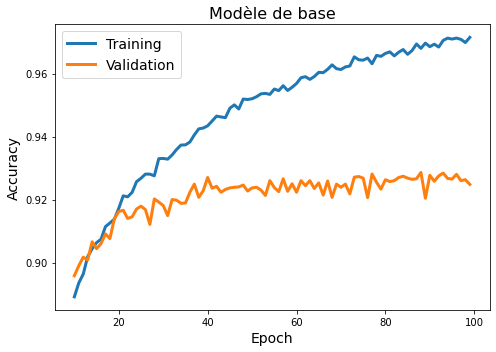

In [90]:
plot_history(history_base, 'Modèle de base', start=10)

L'*accuracy* stagne à partir de 40 époques environ. Il semble qu'ensuite, on arrive en zone de sur-apprentissage; le performance de test stagne, alors que celle de train continue de croitre. Regardons sur quels vêtements le modèle se trompe le plus.

tf.Tensor(
[[ 971    0    6    3    0    0   14    0    2    0]
 [   0  950    0    1    0    0    0    0    0    0]
 [   1    0 1006    0    8    0   10    0    0    0]
 [   2    1    1  973    6    0    4    0    0    0]
 [   0    0   17    3  975    0   10    0    1    0]
 [   0    0    0    0    0  978    0    0    0    2]
 [  35    0   23    5    8    0  959    0    1    0]
 [   0    0    0    0    0    3    0 1012    1    6]
 [   1    0    0    0    1    0    1    0 1010    0]
 [   0    0    0    0    0    0    0    7    0  982]], shape=(10, 10), dtype=int32)


Text(33.0, 0.5, 'classe prédite')

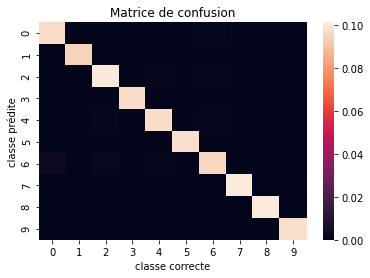

In [91]:
predicted_valid_labels = tf.argmax(base_model(valid_images), axis=1)
int_valid_labels = tf.argmax(valid_labels, axis=1)
base_confusion_matrix = tf.math.confusion_matrix(int_valid_labels, predicted_valid_labels)
print(base_confusion_matrix)

ax = sns.heatmap(base_confusion_matrix/np.sum(base_confusion_matrix))
ax.set_title("Matrice de confusion")
ax.set_xlabel('classe correcte')
ax.set_ylabel('classe prédite')

Vue la matrice de confusion, on voit que les classes 0, 2, 4, et 6 sont les plus confondues. Cela correspond au classes :
- T-shirt
- Pull
- Manteau
- Chemise

Cela semble naturel, car ces vêtements on une forme assez similaire (en opposition aux chaussures par exemple). Regardons plus en détail des exemple d'images mal catégorisée par le modèle.

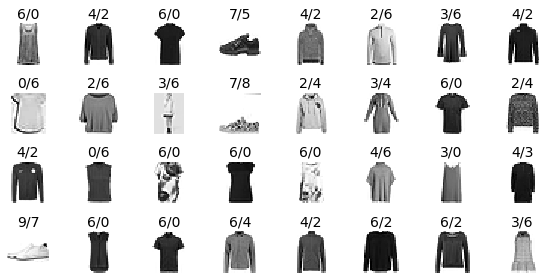

In [92]:
index = predicted_valid_labels != int_valid_labels
wrong = valid_images[index]
wrong_labels = predicted_valid_labels[index].numpy()
right_labels = int_valid_labels[index].numpy()
plot_images(wrong, [f'{r}/{w}' for r,w in zip(right_labels, wrong_labels)])

Sur cette image, le nombre de gauche correspond au vrai label, celui de droite à celui mal prédit. Un `6/0` correspodn par exemple à une chemise prise pour un T-shirt par le model.
Certaines erreurs sont complètement normales, à mon sens, par exemple :
- La première image en haut à droite ne ressemble presque pas à un vêtement, c'est assez dur de savoir ce que c'est.
- La troisième image (aussi un 6/0) est apparement une chemise à manche courte. Mais vue la définition de l'image, les deux ne sont pas vraiment distinguable, même par un humain.

Par contre, une personne raisonnable n'aurait jamais pris l'image 7/8 (en 2ème ligne, 4ème colonne) pour un sac (8).

Il reste donc une marge pour progresser (certaines erreurs sont grossières). Cependant, on ne peut pas s'attendre à avoir un score parfait : la tâche n'est pas aisée même pour un humain.

### Visualisation des poids

On peut essayer de visualiser les poids de la première couche de convolution, et voir s'ils sont interprétables.

(5, 5, 1, 64)


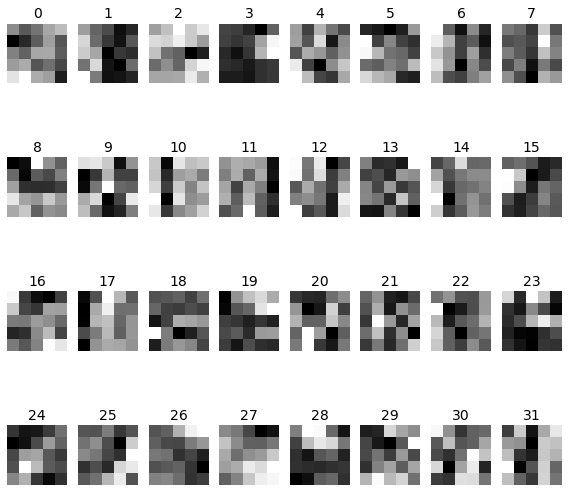

In [104]:
weights, biases = base_model.get_layer('convolution_1').get_weights()
print(weights.shape)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for i in range(n_rows * n_cols):
    ax = plt.subplot(n_rows, n_cols, i+1)
    ax.imshow(weights[:,:,:,i].reshape(5, 5),
               interpolation="none", cmap="gray_r")
    ax.set_title(i, fontsize=14)
    ax.axis("off")
plt.tight_layout()

Ce n'est pas très concluant. On voit quand même que certains noyaux correspondent à des traits verticaux (10,11,17), d'autres à des choses plus horizontales (2, 8?), d'autres encore plutôt diagonales (15,16,25,26,27). Mais on a pas de représentation très claire.

# Variations et influence des hyper-paramètres

On va maintenant faire varier certains hyper-paramètres pour voir leur influences sur l'*accuracy*. On peut faire varier :
- La taille des noyaux
- Le nombre de noyaux
- Le nombre de couches (FFNN / CNN)

## Taille des noyaux

### Plus petits

Tout d'abord des noyaux plus petits : de 5 et 3 on passe à 3 et 2. On arrive par conséquent à une taille de 1024 au lieu de 256, au moment d'arriver à la couche dense.

In [93]:
smallkernel_model = Sequential()

smallkernel_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name='convolution_1', input_shape=input_shape))
smallkernel_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_1'))
smallkernel_model.add(Dropout(0.25, name='dropout_1'))

smallkernel_model.add(Conv2D(128, kernel_size=(2, 2), activation='relu', name='convolution_2'))
smallkernel_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_2'))
smallkernel_model.add(Dropout(0.25, name='dropout_2'))

smallkernel_model.add(Conv2D(256, kernel_size=(2, 2), activation='relu', name='convolution_3'))
smallkernel_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_3'))
smallkernel_model.add(Dropout(0.25, name='dropout_3'))

smallkernel_model.add(Flatten(name='flatten'))

smallkernel_model.add(Dense(256, activation='relu', name='dense'))
smallkernel_model.add(Dropout(0.5, name='dropout_dense'))

smallkernel_model.add(Dense(n_classes, activation='softmax', name='output'))

smallkernel_model.compile(loss=tf.keras.losses.categorical_crossentropy, 
                   optimizer=tf.keras.optimizers.Adam(), 
                   metrics=['accuracy'])
smallkernel_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution_1 (Conv2D)       (None, 26, 26, 64)        640       
_________________________________________________________________
pooling_1 (MaxPooling2D)     (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
convolution_2 (Conv2D)       (None, 12, 12, 128)       32896     
_________________________________________________________________
pooling_2 (MaxPooling2D)     (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
convolution_3 (Conv2D)       (None, 5, 5, 256)        

In [96]:
smallkernel_history = fit_model(smallkernel_model, epochs=100)

Epoch 1/100
49/49 [==============================] - 2s 39ms/step - loss: 0.6141 - accuracy: 0.7693 - val_loss: 0.5300 - val_accuracy: 0.7981
Epoch 2/100
49/49 [==============================] - 2s 39ms/step - loss: 0.5600 - accuracy: 0.7908 - val_loss: 0.4929 - val_accuracy: 0.8195
Epoch 3/100
49/49 [==============================] - 2s 39ms/step - loss: 0.5137 - accuracy: 0.8107 - val_loss: 0.4509 - val_accuracy: 0.8290
Epoch 4/100
49/49 [==============================] - 2s 39ms/step - loss: 0.4799 - accuracy: 0.8216 - val_loss: 0.4358 - val_accuracy: 0.8334
Epoch 5/100
49/49 [==============================] - 2s 39ms/step - loss: 0.4511 - accuracy: 0.8333 - val_loss: 0.4035 - val_accuracy: 0.8481
Epoch 6/100
49/49 [==============================] - 2s 40ms/step - loss: 0.4306 - accuracy: 0.8422 - val_loss: 0.3821 - val_accuracy: 0.8567
Epoch 7/100
49/49 [==============================] - 2s 39ms/step - loss: 0.4091 - accuracy: 0.8487 - val_loss: 0.3772 - val_accuracy: 0.8584
Epoch 

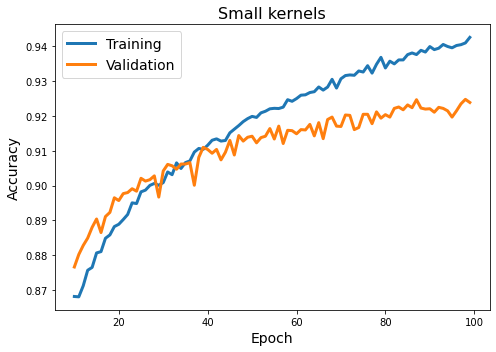

In [105]:
plot_history(smallkernel_history, 'Small kernels', start=10)

On a pas l'air de perdre beaucoup de performance en passant à de plus petit noyaux (et on a au passage perdu 100 000 paramètre sur le modèle total).

- Au bout de 30 epochs : plus de 90%
- Au bout de 80 epochs : plus de 92%

La performance semble ne pas s'améliorer au dela de 80 époques. On voit que ce modèle est plus long à apprendre, mais atteint la même performance que le modèle de base.

### Plus grands

Maitenant des noyaux plus grand ! On enlève la première étape de pooling pour pouvoir garder 3 couches de convolution.

In [107]:
bigkernel_model = Sequential()

bigkernel_model.add(Conv2D(64, kernel_size=(7, 7), activation='relu', name='convolution_1', input_shape=input_shape))
#bigkernel_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_1'))
bigkernel_model.add(Dropout(0.25, name='dropout_1'))

bigkernel_model.add(Conv2D(128, kernel_size=(7, 7), activation='relu', name='convolution_2'))
bigkernel_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_2'))
bigkernel_model.add(Dropout(0.25, name='dropout_2'))

bigkernel_model.add(Conv2D(256, kernel_size=(2, 2), activation='relu', name='convolution_3'))
bigkernel_model.add(MaxPooling2D(pool_size=(3,3), name='pooling_3'))
bigkernel_model.add(Dropout(0.25, name='dropout_3'))

bigkernel_model.add(Flatten(name='flatten'))

bigkernel_model.add(Dense(256, activation='relu', name='dense'))
bigkernel_model.add(Dropout(0.5, name='dropout_dense'))

bigkernel_model.add(Dense(n_classes, activation='softmax', name='output'))

bigkernel_model.compile(loss=tf.keras.losses.categorical_crossentropy, 
                   optimizer=tf.keras.optimizers.Adam(), 
                   metrics=['accuracy'])
bigkernel_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution_1 (Conv2D)       (None, 22, 22, 64)        3200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
convolution_2 (Conv2D)       (None, 16, 16, 128)       401536    
_________________________________________________________________
pooling_2 (MaxPooling2D)     (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
convolution_3 (Conv2D)       (None, 7, 7, 256)         131328    
_________________________________________________________________
pooling_3 (MaxPooling2D)     (None, 2, 2, 256)        

In [ ]:
bigkernel_history = fit_model(bigkernel_model, epochs=100)

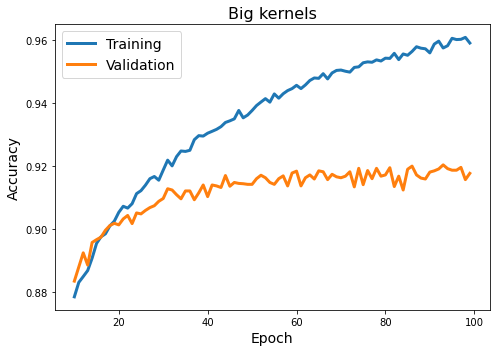

In [112]:
plot_history(bigkernel_history, 'Big kernels', start=10)

On voit ici que la performance est dégradée : on plafonne très vite vers 91% d'accuracy.
Mettre des grands noyaux est visiblement néfaste.

C'est peut-être parce que l'image est déjà petite et que 7x7 pixels contiennent déjà beaucoup d'information. Aussi, les noyaux pourrait être trop peu nombreux par rapport à leur grande taille.

----

Vus ces deux modèles, il semble plus judicieux de :
- soit conserver la taille des noyaux
- soit de la réduire un peu, pour perdre en complexité sans perdre en performance

## Nombre de noyaux

Cette fois-ci nous allons changer le nombre de noyaux (le nombre de paramètre va forcément changer)

### Plus nombreux

In [117]:
manykernels_model = Sequential()

manykernels_model.add(Conv2D(256, kernel_size=(5, 5), activation='relu', name='convolution_1', input_shape=input_shape))
manykernels_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_1'))
manykernels_model.add(Dropout(0.25, name='dropout_1'))

manykernels_model.add(Conv2D(512, kernel_size=(5, 5), activation='relu', name='convolution_2'))
manykernels_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_2'))
manykernels_model.add(Dropout(0.25, name='dropout_2'))

manykernels_model.add(Conv2D(1024, kernel_size=(3, 3), activation='relu', name='convolution_3'))
manykernels_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_3'))
manykernels_model.add(Dropout(0.25, name='dropout_3'))

manykernels_model.add(Flatten(name='flatten'))

manykernels_model.add(Dense(256, activation='relu', name='dense'))
manykernels_model.add(Dropout(0.5, name='dropout_dense'))

manykernels_model.add(Dense(n_classes, activation='softmax', name='output'))

manykernels_model.compile(loss=tf.keras.losses.categorical_crossentropy, 
                   optimizer=tf.keras.optimizers.Adam(), 
                   metrics=['accuracy'])
manykernels_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution_1 (Conv2D)       (None, 24, 24, 256)       6656      
_________________________________________________________________
pooling_1 (MaxPooling2D)     (None, 12, 12, 256)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 256)       0         
_________________________________________________________________
convolution_2 (Conv2D)       (None, 8, 8, 512)         3277312   
_________________________________________________________________
pooling_2 (MaxPooling2D)     (None, 4, 4, 512)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 512)         0         
_________________________________________________________________
convolution_3 (Conv2D)       (None, 2, 2, 1024)       

On entrainera pendant moins longtemps que les autres, vu le nombre déraisonnable de paramètres.

In [118]:
manykernels_history = fit_model(manykernels_model, epochs=40)

Epoch 1/40
49/49 [==============================] - 9s 182ms/step - loss: 1.0391 - accuracy: 0.6148 - val_loss: 0.5722 - val_accuracy: 0.7804
Epoch 2/40
49/49 [==============================] - 9s 177ms/step - loss: 0.5233 - accuracy: 0.8073 - val_loss: 0.4090 - val_accuracy: 0.8477
Epoch 3/40
49/49 [==============================] - 9s 178ms/step - loss: 0.4071 - accuracy: 0.8543 - val_loss: 0.3444 - val_accuracy: 0.8741
Epoch 4/40
49/49 [==============================] - 9s 177ms/step - loss: 0.3480 - accuracy: 0.8756 - val_loss: 0.3086 - val_accuracy: 0.8885
Epoch 5/40
49/49 [==============================] - 9s 180ms/step - loss: 0.3203 - accuracy: 0.8848 - val_loss: 0.2873 - val_accuracy: 0.8922
Epoch 6/40
49/49 [==============================] - 9s 183ms/step - loss: 0.2896 - accuracy: 0.8950 - val_loss: 0.2770 - val_accuracy: 0.8994
Epoch 7/40
49/49 [==============================] - 9s 178ms/step - loss: 0.2710 - accuracy: 0.9026 - val_loss: 0.2761 - val_accuracy: 0.8983
Epoch 

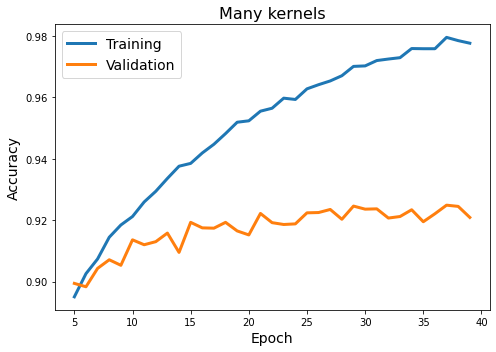

In [119]:
plot_history(manykernels_history, 'Many kernels', start=5)

On atteint très vite (vers l'époque 20) les 92%, puis on plafonne. L'accuracy du set de train s'envole jusqu'à 98% : on est très clairement en sur-apprentissage, le modèle est beaucoup trop gros.

On a donc a priori pas *besoin* de beaucoup de noyaux. Essayons avec très peu :

### Moins nombreux

In [123]:
fewkernels_model = Sequential()

fewkernels_model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', name='convolution_1', input_shape=input_shape))
fewkernels_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_1'))
fewkernels_model.add(Dropout(0.25, name='dropout_1'))

fewkernels_model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', name='convolution_2'))
fewkernels_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_2'))
fewkernels_model.add(Dropout(0.25, name='dropout_2'))

fewkernels_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name='convolution_3'))
fewkernels_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_3'))
fewkernels_model.add(Dropout(0.25, name='dropout_3'))

fewkernels_model.add(Flatten(name='flatten'))

fewkernels_model.add(Dense(256, activation='relu', name='dense'))
fewkernels_model.add(Dropout(0.5, name='dropout_dense'))

fewkernels_model.add(Dense(n_classes, activation='softmax', name='output'))

fewkernels_model.compile(loss=tf.keras.losses.categorical_crossentropy, 
                   optimizer=tf.keras.optimizers.Adam(), 
                   metrics=['accuracy'])
fewkernels_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution_1 (Conv2D)       (None, 24, 24, 16)        416       
_________________________________________________________________
pooling_1 (MaxPooling2D)     (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
convolution_2 (Conv2D)       (None, 8, 8, 32)          12832     
_________________________________________________________________
pooling_2 (MaxPooling2D)     (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
convolution_3 (Conv2D)       (None, 2, 2, 64)         

On a ici un modèle 10 fois plus petit (en nombre de paramètres) que le modèle de base.

In [124]:
fewkernels_history = fit_model(fewkernels_model, epochs=200)

Epoch 1/200
49/49 [==============================] - 1s 17ms/step - loss: 1.6117 - accuracy: 0.3973 - val_loss: 0.9070 - val_accuracy: 0.6757
Epoch 2/200
49/49 [==============================] - 1s 13ms/step - loss: 0.9075 - accuracy: 0.6494 - val_loss: 0.7190 - val_accuracy: 0.7304
Epoch 3/200
49/49 [==============================] - 1s 13ms/step - loss: 0.7587 - accuracy: 0.7087 - val_loss: 0.6500 - val_accuracy: 0.7467
Epoch 4/200
49/49 [==============================] - 1s 13ms/step - loss: 0.6887 - accuracy: 0.7360 - val_loss: 0.6031 - val_accuracy: 0.7650
Epoch 5/200
49/49 [==============================] - 1s 13ms/step - loss: 0.6459 - accuracy: 0.7525 - val_loss: 0.5650 - val_accuracy: 0.7782
Epoch 6/200
49/49 [==============================] - 1s 13ms/step - loss: 0.6073 - accuracy: 0.7669 - val_loss: 0.5280 - val_accuracy: 0.7936
Epoch 7/200
49/49 [==============================] - 1s 13ms/step - loss: 0.5781 - accuracy: 0.7816 - val_loss: 0.5024 - val_accuracy: 0.8100
Epoch 

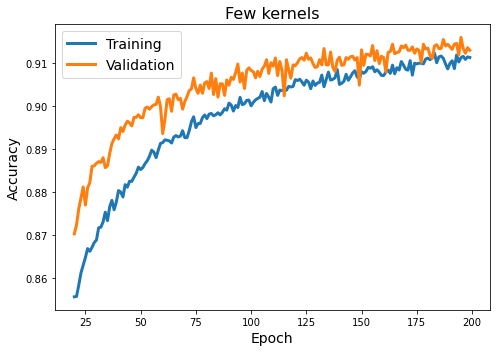

In [125]:
plot_history(fewkernels_history, 'Few kernels', start=20)

Plus d'entrainement est nécéssaire pour atteindre une bonne performance (90% au bout d'une centaines d'époques). Même au bout de 200, on n'arrive pas en sur-apprentissage. On pourrait sûrement continuer un peu, mais on ne gagnerai sûrement plus grand chose.

Ce qui est intéressant, c'est qu'on arrive presque au même niveau que le modèle de base (à un point près), alors qu'on a 10 fois moins de paramètres. Il y a probablement une bonne progression possible sans dépasser les 500 000 paramètres.

----

Vus ces résultat, je pense qu'on peut se contenter de peu de noyaux; eux-même de taille relativement modeste. Cela nous laisse alors de la place pour des réseaux plus profonds; que nous verrons ensuite.

## Influence du padding

Avec le *padding* par défaut `valid`, on perd peu à peu l'information qui est au bord. En effet, les pixels se trouvant sur les bords seront "vus" par moins de noyaux. Essayons donc avec `padding='same'`. On augmente la taille de pool de la dernière étape, pour ne pas faire exploser le nombre de paramètres.

In [127]:
same_model = Sequential()

same_model.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu', name='convolution_1', input_shape=input_shape))
same_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_1'))
same_model.add(Dropout(0.25, name='dropout_1'))

same_model.add(Conv2D(128, kernel_size=(5, 5), padding='same', activation='relu', name='convolution_2'))
same_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_2'))
same_model.add(Dropout(0.25, name='dropout_2'))

same_model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu', name='convolution_3'))
same_model.add(MaxPooling2D(pool_size=(3,3), name='pooling_3'))
same_model.add(Dropout(0.25, name='dropout_3'))


same_model.add(Flatten(name='flatten'))

same_model.add(Dense(256, activation='relu', name='dense'))
same_model.add(Dropout(0.5, name='dropout_dense'))

same_model.add(Dense(n_classes, activation='softmax', name='output'))

same_model.compile(loss=tf.keras.losses.categorical_crossentropy, 
                   optimizer=tf.keras.optimizers.Adam(), 
                   metrics=['accuracy'])
same_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution_1 (Conv2D)       (None, 28, 28, 64)        1664      
_________________________________________________________________
pooling_1 (MaxPooling2D)     (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
convolution_2 (Conv2D)       (None, 14, 14, 128)       204928    
_________________________________________________________________
pooling_2 (MaxPooling2D)     (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
convolution_3 (Conv2D)       (None, 7, 7, 256)        

In [128]:
same_history = fit_model(same_model, epochs=100)

Epoch 1/100
49/49 [==============================] - 4s 86ms/step - loss: 1.1009 - accuracy: 0.5962 - val_loss: 0.5993 - val_accuracy: 0.7718
Epoch 2/100
49/49 [==============================] - 3s 70ms/step - loss: 0.5796 - accuracy: 0.7880 - val_loss: 0.4594 - val_accuracy: 0.8331
Epoch 3/100
49/49 [==============================] - 3s 70ms/step - loss: 0.4676 - accuracy: 0.8304 - val_loss: 0.3886 - val_accuracy: 0.8572
Epoch 4/100
49/49 [==============================] - 3s 70ms/step - loss: 0.4097 - accuracy: 0.8529 - val_loss: 0.3462 - val_accuracy: 0.8754
Epoch 5/100
49/49 [==============================] - 3s 70ms/step - loss: 0.3693 - accuracy: 0.8677 - val_loss: 0.3243 - val_accuracy: 0.8824
Epoch 6/100
49/49 [==============================] - 3s 71ms/step - loss: 0.3438 - accuracy: 0.8759 - val_loss: 0.3034 - val_accuracy: 0.8896
Epoch 7/100
49/49 [==============================] - 3s 71ms/step - loss: 0.3253 - accuracy: 0.8829 - val_loss: 0.2860 - val_accuracy: 0.8956
Epoch 

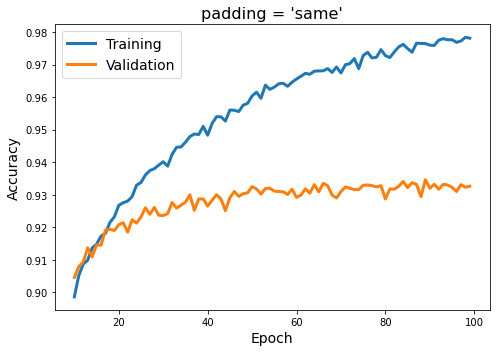

In [129]:
plot_history(same_history, "padding = 'same'", start=10)

L'accuracy test se stabilise à partir de l'époque 50 environ, autour de 93%. La performance est 1 point meilleure qu'avec le modèle de base. C'est donc plutôt une bonne affaire.

## Profondeur du *CNN*

Essayons d'ajouter deux couches convolutionnelles au réseau. Je garde `padding='same'`, car je pense que l'information au bord serait d'autant plus perdue qu'il y a de couche. Deux max pooling doivent être supprimés, sinon la dimension des images réduirait trop vite; et le nombre de noyaux est diminué, pour garder le nombre de paramètre dans le demi-million.

In [138]:
deepcnn_model = Sequential()

deepcnn_model.add(Conv2D(32, kernel_size=(5, 5), padding='same', activation='relu', name='convolution_1', input_shape=input_shape))
#deepcnn_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_1'))
deepcnn_model.add(Dropout(0.25, name='dropout_1'))

deepcnn_model.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu', name='convolution_2'))
deepcnn_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_2'))
deepcnn_model.add(Dropout(0.25, name='dropout_2'))

deepcnn_model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', name='convolution_3'))
#deepcnn_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_3'))
deepcnn_model.add(Dropout(0.25, name='dropout_3'))

deepcnn_model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu', name='convolution_4'))
deepcnn_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_4'))
deepcnn_model.add(Dropout(0.25, name='dropout_4'))

deepcnn_model.add(Conv2D(192, kernel_size=(3, 3), padding='same', activation='relu', name='convolution_5'))
deepcnn_model.add(MaxPooling2D(pool_size=(3,3), name='pooling_5'))
deepcnn_model.add(Dropout(0.25, name='dropout_5'))

deepcnn_model.add(Flatten(name='flatten'))

deepcnn_model.add(Dense(256, activation='relu', name='dense'))
deepcnn_model.add(Dropout(0.5, name='dropout_dense'))

deepcnn_model.add(Dense(n_classes, activation='softmax', name='output'))

deepcnn_model.compile(loss=tf.keras.losses.categorical_crossentropy, 
                   optimizer=tf.keras.optimizers.Adam(), 
                   metrics=['accuracy'])
deepcnn_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution_1 (Conv2D)       (None, 28, 28, 32)        832       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
convolution_2 (Conv2D)       (None, 28, 28, 64)        51264     
_________________________________________________________________
pooling_2 (MaxPooling2D)     (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
convolution_3 (Conv2D)       (None, 14, 14, 64)        36928     
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)      

In [139]:
deepcnn_history = fit_model(deepcnn_model, epochs=100)

Epoch 1/100
49/49 [==============================] - 6s 112ms/step - loss: 1.2334 - accuracy: 0.5446 - val_loss: 0.7169 - val_accuracy: 0.7474
Epoch 2/100
49/49 [==============================] - 4s 91ms/step - loss: 0.6588 - accuracy: 0.7579 - val_loss: 0.5157 - val_accuracy: 0.8117
Epoch 3/100
49/49 [==============================] - 4s 91ms/step - loss: 0.5283 - accuracy: 0.8054 - val_loss: 0.4293 - val_accuracy: 0.8395
Epoch 4/100
49/49 [==============================] - 4s 91ms/step - loss: 0.4545 - accuracy: 0.8321 - val_loss: 0.3841 - val_accuracy: 0.8513
Epoch 5/100
49/49 [==============================] - 4s 90ms/step - loss: 0.4166 - accuracy: 0.8481 - val_loss: 0.3490 - val_accuracy: 0.8664
Epoch 6/100
49/49 [==============================] - 4s 91ms/step - loss: 0.3825 - accuracy: 0.8586 - val_loss: 0.3310 - val_accuracy: 0.8775
Epoch 7/100
49/49 [==============================] - 4s 91ms/step - loss: 0.3604 - accuracy: 0.8660 - val_loss: 0.3079 - val_accuracy: 0.8859
Epoch

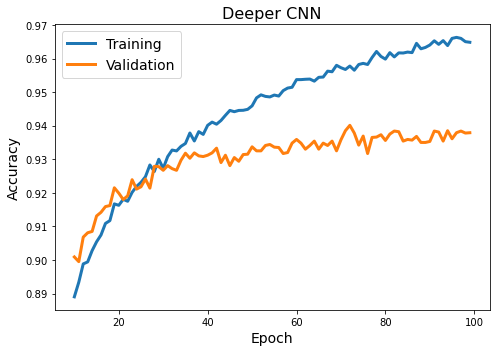

In [142]:
plot_history(deepcnn_history, 'Deeper CNN', start=10)

On gagne effectivement en performance (même si la différence est fine) : on frôle les 94% d'accuracy sur le set de validation. Une ou deux couches supplémentaires semble bénéfique.

## Profondeur de la couche dense

On va essayer d'ajouter une couche dense. On utilisera comme base le modèle `fewkernels` pour limiter le nombre de paramètres.

In [143]:
doubledense = Sequential()

doubledense.add(Conv2D(64, kernel_size=(5, 5), activation='relu', name='convolution_1', input_shape=input_shape))
doubledense.add(MaxPooling2D(pool_size=(2,2), name='pooling_1'))
doubledense.add(Dropout(0.25, name='dropout_1'))

doubledense.add(Conv2D(128, kernel_size=(5, 5), activation='relu', name='convolution_2'))
doubledense.add(MaxPooling2D(pool_size=(2,2), name='pooling_2'))
doubledense.add(Dropout(0.25, name='dropout_2'))

doubledense.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='convolution_3'))
doubledense.add(MaxPooling2D(pool_size=(2,2), name='pooling_3'))
doubledense.add(Dropout(0.25, name='dropout_3'))

doubledense.add(Flatten(name='flatten'))

doubledense.add(Dense(256, activation='relu', name='dense1'))
doubledense.add(Dropout(0.3, name='dropout_dense1'))

doubledense.add(Dense(128, activation='relu', name='dense2'))
doubledense.add(Dropout(0.3, name='dropout_dense2'))

doubledense.add(Dense(n_classes, activation='softmax', name='output'))

doubledense.compile(loss=tf.keras.losses.categorical_crossentropy, 
                   optimizer=tf.keras.optimizers.Adam(), 
                   metrics=['accuracy'])
doubledense.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution_1 (Conv2D)       (None, 24, 24, 64)        1664      
_________________________________________________________________
pooling_1 (MaxPooling2D)     (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
convolution_2 (Conv2D)       (None, 8, 8, 128)         204928    
_________________________________________________________________
pooling_2 (MaxPooling2D)     (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
convolution_3 (Conv2D)       (None, 2, 2, 256)       

In [144]:
doubledense_history = fit_model(doubledense, epochs=100)

Epoch 1/100
49/49 [==============================] - 2s 41ms/step - loss: 1.2811 - accuracy: 0.5205 - val_loss: 0.7077 - val_accuracy: 0.7398
Epoch 2/100
49/49 [==============================] - 2s 37ms/step - loss: 0.6966 - accuracy: 0.7371 - val_loss: 0.5689 - val_accuracy: 0.7827
Epoch 3/100
49/49 [==============================] - 2s 37ms/step - loss: 0.5796 - accuracy: 0.7812 - val_loss: 0.4839 - val_accuracy: 0.8211
Epoch 4/100
49/49 [==============================] - 2s 37ms/step - loss: 0.4911 - accuracy: 0.8222 - val_loss: 0.4104 - val_accuracy: 0.8487
Epoch 5/100
49/49 [==============================] - 2s 37ms/step - loss: 0.4338 - accuracy: 0.8448 - val_loss: 0.3737 - val_accuracy: 0.8663
Epoch 6/100
49/49 [==============================] - 2s 37ms/step - loss: 0.3925 - accuracy: 0.8612 - val_loss: 0.3438 - val_accuracy: 0.8739
Epoch 7/100
49/49 [==============================] - 2s 37ms/step - loss: 0.3701 - accuracy: 0.8681 - val_loss: 0.3200 - val_accuracy: 0.8819
Epoch 

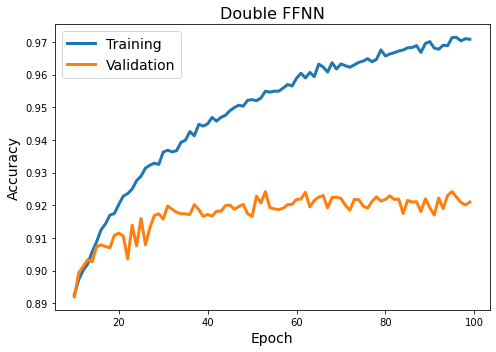

In [145]:
plot_history(doubledense_history, 'Double FFNN', start=10)

On obtient quelque-chose d'un peu mieux que `fewkernels`. C'est donc peut-être une bonne idée de mettre une deuxième couche dense, mais le gain n'est pas énorme.

# Modèle final
En prenant en compte tout ces hyper-paramètre, on va essayer de faire le meilleur modèle possible. On évaluera ensuite le résutat final sur le dataset de *test*. D'après ce qu'on a appris, il faudrait :
- Des noyaux plus petits ou de même taille (faible influence).
- Des noyaux un moins nombreux pour avoir un modèle plus léger, sans trop perdre en performance.
- Un padding pour ne pas perdre l'information du bord (grand influence!).
- Une ou deux couches de CNN en plus, eventuellement une douche dense en plus.
- Clairement pas plus d'un million de paramètres, moins de 500k si possible.

## Création du modèle

In [176]:
final_model = Sequential()

final_model.add(Conv2D(32, kernel_size=(4, 4), padding='same', activation='relu', name='convolution_1', input_shape=input_shape))
#final_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_1'))
final_model.add(Dropout(0.25, name='dropout_1'))

final_model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', name='convolution_2'))
final_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_2'))
final_model.add(Dropout(0.25, name='dropout_2'))

final_model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', name='convolution_3'))
#final_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_3'))
final_model.add(Dropout(0.25, name='dropout_3'))

final_model.add(Conv2D(128, kernel_size=(2, 2), padding='same', activation='relu', name='convolution_4'))
final_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_4'))
final_model.add(Dropout(0.25, name='dropout_4'))

final_model.add(Conv2D(256, kernel_size=(2, 2), padding='same', activation='relu', name='convolution_5'))
final_model.add(MaxPooling2D(pool_size=(3,3), name='pooling_5'))
final_model.add(Dropout(0.25, name='dropout_5'))

final_model.add(Flatten(name='flatten'))

#final_model.add(Dense(256, activation='relu', name='dense1'))
#final_model.add(Dropout(0.5, name='dropout_dense1'))

final_model.add(Dense(256, activation='relu', name='dense'))
final_model.add(Dropout(0.25, name='dropout_dense'))

final_model.add(Dense(n_classes, activation='softmax', name='output'))

final_model.compile(loss=tf.keras.losses.categorical_crossentropy, 
                   optimizer=tf.keras.optimizers.Adam(), 
                   metrics=['accuracy'])
final_model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution_1 (Conv2D)       (None, 28, 28, 32)        544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
convolution_2 (Conv2D)       (None, 28, 28, 64)        18496     
_________________________________________________________________
pooling_2 (MaxPooling2D)     (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
convolution_3 (Conv2D)       (None, 14, 14, 64)        36928     
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)      

## Entraînement

In [177]:
final_history = fit_model(final_model, epochs=100)

Epoch 1/100
49/49 [==============================] - 5s 96ms/step - loss: 1.2949 - accuracy: 0.5222 - val_loss: 0.7810 - val_accuracy: 0.7482
Epoch 2/100
49/49 [==============================] - 4s 85ms/step - loss: 0.6856 - accuracy: 0.7443 - val_loss: 0.6426 - val_accuracy: 0.7751
Epoch 3/100
49/49 [==============================] - 4s 84ms/step - loss: 0.5823 - accuracy: 0.7817 - val_loss: 0.5353 - val_accuracy: 0.8100
Epoch 4/100
49/49 [==============================] - 4s 84ms/step - loss: 0.5167 - accuracy: 0.8068 - val_loss: 0.4732 - val_accuracy: 0.8305
Epoch 5/100
49/49 [==============================] - 4s 84ms/step - loss: 0.4725 - accuracy: 0.8242 - val_loss: 0.4234 - val_accuracy: 0.8472
Epoch 6/100
49/49 [==============================] - 4s 85ms/step - loss: 0.4342 - accuracy: 0.8398 - val_loss: 0.4066 - val_accuracy: 0.8535
Epoch 7/100
49/49 [==============================] - 4s 85ms/step - loss: 0.4085 - accuracy: 0.8479 - val_loss: 0.3645 - val_accuracy: 0.8656
Epoch 

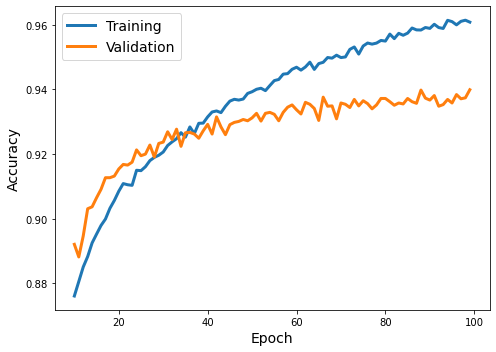

In [178]:
plot_history(final_history, start=10)

On a pas une accuracy très superieure aux autres modèle; mais on arrive quand même à 94% sur le set de validation avec un modèle plus petit que celui de base (485k vs 570k).

Maintenant qu'on a crée, et entrainé notre modèle final, testons le sur le set de test (qui n'a pas été utilisé pour entraîner, ni pour choisir les hyper-paramètres).

## Test

In [183]:
score = final_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.2033 - accuracy: 0.9335


Cela confirme nos résultat, on a pas "trop" selectionné le model. Je pense qu'il est possible de faire mieux en choississant mieux les paramètres qu'on a exploré. Mais il n'est pas facile de les choisir; et c'est assez chronophage.

# Comparaison des "bons" modèles

In [164]:
def plot_multiple_hist(hist, names, start):
    plt.figure(figsize=(7, 5))
    for history, name in zip(hist,names):
        plt.plot(history.epoch[start:], history.history['val_accuracy'][start:], lw=3, label=name)
    plt.legend(fontsize=14)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Validation acc.', fontsize=14)
    plt.tight_layout()

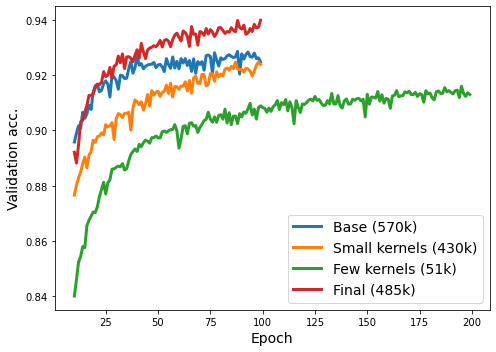

In [190]:
plot_multiple_hist([history_base,
                   smallkernel_history,
                   fewkernels_history,
                   final_history],
                   names = ["Base (570k)",
                           "Small kernels (430k)",
                           "Few kernels (51k)",
                           "Final (485k)"],
                   start=10)

Sur ce graphique on voit l'accuracy de différents modèles, en fonction des époques, sur le set de validation. On voit ici que le modèle final atteint une meilleure performance, et ce en moins de "temps".

# Conclusion

Quelques remarques en guise de conclusion :

L'espace des hyper-paramètres est très difficile et long à explorer ! Ici, on a changé (approximativement) un seul hyper-paramètre à la fois. Il en reste beaucoup dont on a pas parlé : mettre ou non des max pooling, leur taille; faire un stride plus long, mettre un paramètre de dilution; changer l'algorithme d'optimisation, ou la taille du mini-batch... D'autant qu'entrainer un modèle met à chaque fois un certain temps, et que les effets de ces hyper-paramètres ne sont clairement pas indépendants.

Dans notre cas précis, le padding a une importance surprenante (à mon sens). Cela est peut-être dû à la faible résulution des images, qui fait que beaucoup d'information se trouve sur les bords.

On peut obtenir les même performances avec moins de paramètres, et, inversement, simplement faire un modèle "plus complexe" peut dégrader les performance. Celà est peut-être dû au sur-apprentissage plus facile (pour remédier à cela, il faudrait utiliser des techniques de régularisation : encore des hyper-paramètres !). 

# Sur-parametrisation

In [43]:
over_model = Sequential()

over_model.add(Conv2D(300, kernel_size=(5, 5), padding='same', activation='relu', name='convolution_1', input_shape=input_shape))
over_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_1'))
over_model.add(Dropout(0.25, name='dropout_1'))

over_model.add(Conv2D(600, kernel_size=(5, 5), padding='same', activation='relu', name='convolution_2'))
over_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_2'))
over_model.add(Dropout(0.25, name='dropout_2'))

over_model.add(Conv2D(1200, kernel_size=(3, 3), padding='same', activation='relu', name='convolution_3'))
over_model.add(MaxPooling2D(pool_size=(2,2), name='pooling_3'))
over_model.add(Dropout(0.25, name='dropout_3'))


over_model.add(Flatten(name='flatten'))

over_model.add(Dense(1024, activation='relu', name='dense'))
over_model.add(Dropout(0.5, name='dropout_dense'))

over_model.add(Dense(n_classes, activation='softmax', name='output'))

over_model.compile(loss=tf.keras.losses.categorical_crossentropy, 
                   optimizer=tf.keras.optimizers.Adam(), 
                   metrics=['accuracy'])
over_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution_1 (Conv2D)       (None, 28, 28, 300)       7800      
_________________________________________________________________
pooling_1 (MaxPooling2D)     (None, 14, 14, 300)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 300)       0         
_________________________________________________________________
convolution_2 (Conv2D)       (None, 14, 14, 600)       4500600   
_________________________________________________________________
pooling_2 (MaxPooling2D)     (None, 7, 7, 600)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 600)         0         
_________________________________________________________________
convolution_3 (Conv2D)       (None, 7, 7, 1200)       

In [44]:
over_history = fit_model(over_model, epochs=100)

Epoch 1/100
49/49 [==============================] - 30s 609ms/step - loss: 0.9919 - accuracy: 0.6374 - val_loss: 0.4584 - val_accuracy: 0.8289
Epoch 2/100
49/49 [==============================] - 24s 493ms/step - loss: 0.4194 - accuracy: 0.8462 - val_loss: 0.3370 - val_accuracy: 0.8786
Epoch 3/100
49/49 [==============================] - 24s 493ms/step - loss: 0.3346 - accuracy: 0.8757 - val_loss: 0.2998 - val_accuracy: 0.8885
Epoch 4/100
49/49 [==============================] - 24s 493ms/step - loss: 0.2907 - accuracy: 0.8937 - val_loss: 0.2622 - val_accuracy: 0.9051
Epoch 5/100
49/49 [==============================] - 24s 493ms/step - loss: 0.2659 - accuracy: 0.9016 - val_loss: 0.2500 - val_accuracy: 0.9102
Epoch 6/100
49/49 [==============================] - 24s 495ms/step - loss: 0.2479 - accuracy: 0.9084 - val_loss: 0.2351 - val_accuracy: 0.9154
Epoch 7/100
49/49 [==============================] - 24s 494ms/step - loss: 0.2275 - accuracy: 0.9165 - val_loss: 0.2344 - val_accuracy:

KeyboardInterrupt: 